In [631]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [632]:
# import the data 
risk = pd.read_excel(r'./data_case.xlsx')
risk

,User_ID,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Member_since,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk
0,10386.0,male,34.6,A,Non_Verified,Homosexual,Switch,Men,50,41169,32,0.0,0.0,0.0,No_risk
1,14.0,male,32.2,J,Non_Verified,Heterosexual,Dominant,Women,518,40118,710,9.0,0.0,0.0,No_risk
2,16721.0,male,33.6,K,Non_Verified,Heterosexual,Dominant,Women,150,41365,25,1.0,1.0,45.0,No_risk
3,16957.0,male,34.0,H,Non_Verified,Heterosexual,Dominant,Women,114,41372,107,1.0,0.0,1.0,No_risk
4,17125.0,male,39.5,B,Non_Verified,Heterosexual,Dominant,Women,497,41378,600,0.0,6.0,8.0,No_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,5675.0,male,36.2,N,Non_Verified,Heterosexual,Submisive,Women,52,41088,51,1.0,0.0,0.0,High_risk
85,5782.0,male,29.9,A,Non_Verified,Heterosexual,Submisive,Women,155,41091,209,0.0,0.0,0.0,High_risk
86,6035.0,male,52.3,A,Non_Verified,Heterosexual,Submisive,Women,114,41092,120,1.0,0.0,0.0,High_risk
87,6288.0,female,28.8,A,Non_Verified,bicurious,Dominant,Nobody,10,41094,11,0.0,0.0,0.0,High_risk


In [633]:
risk.dtypes

User_ID                                float64
Gender                                  object
Age                                    float64
Location                                object
Verification                            object
Sexual_orientation                      object
Sexual_polarity                         object
Looking_for                             object
Points_Rank                             object
Member_since                             int64
Number_of_Comments_in_public_forum       int64
Number_of_advertisments_posted         float64
Number_of_offline_meetings_attended    float64
Profile_pictures                       float64
Risk                                    object
dtype: object

In [634]:
risk.duplicated().sum()

0

In [635]:
risk.isna().sum()

User_ID                                0
Gender                                 0
Age                                    0
Location                               0
Verification                           0
Sexual_orientation                     0
Sexual_polarity                        0
Looking_for                            1
Points_Rank                            0
Member_since                           0
Number_of_Comments_in_public_forum     0
Number_of_advertisments_posted         0
Number_of_offline_meetings_attended    0
Profile_pictures                       0
Risk                                   0
dtype: int64

In [636]:
risk.dropna(inplace=True)

In [637]:
risk.describe()

,User_ID,Age,Member_since,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,23587.863636,36.467045,41674.602273,119.556818,0.579545,0.534091,4.022727
std,15667.389955,9.136320,726.285251,263.205826,2.082889,1.800057,9.766206
min,14.000000,20.700000,40118.000000,0.000000,0.000000,0.000000,0.000000
25%,9211.250000,28.775000,41139.500000,0.000000,0.000000,0.000000,0.000000
50%,21053.000000,35.550000,41524.500000,21.000000,0.000000,0.000000,0.000000
75%,37915.500000,42.100000,42287.250000,98.750000,0.250000,0.000000,2.000000
max,48294.000000,62.000000,42840.000000,1894.000000,17.000000,11.000000,48.000000


In [638]:
del risk['User_ID']

In [639]:
risk.columns

Index(['Gender', 'Age', 'Location', 'Verification', 'Sexual_orientation',
       'Sexual_polarity', 'Looking_for', 'Points_Rank', 'Member_since',
       'Number_of_Comments_in_public_forum', 'Number_of_advertisments_posted',
       'Number_of_offline_meetings_attended', 'Profile_pictures', 'Risk'],
      dtype='object')

In [640]:
risk.head()

,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Member_since,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk
0,male,34.6,A,Non_Verified,Homosexual,Switch,Men,50,41169,32,0.0,0.0,0.0,No_risk
1,male,32.2,J,Non_Verified,Heterosexual,Dominant,Women,518,40118,710,9.0,0.0,0.0,No_risk
2,male,33.6,K,Non_Verified,Heterosexual,Dominant,Women,150,41365,25,1.0,1.0,45.0,No_risk
3,male,34.0,H,Non_Verified,Heterosexual,Dominant,Women,114,41372,107,1.0,0.0,1.0,No_risk
4,male,39.5,B,Non_Verified,Heterosexual,Dominant,Women,497,41378,600,0.0,6.0,8.0,No_risk


In [641]:
print(risk['Gender'].unique())
print(risk['Location'].unique())
print(risk['Verification'].unique())
print(risk['Sexual_orientation'].unique())
print(risk['Sexual_polarity'].unique())
print(risk['Looking_for'].unique())
print(risk['Risk'].unique())

['male' 'female']
['A' 'J' 'K' 'H' 'B' 'L' 'F' 'E' 'C' 'M' 'O' 'S' 'N']
['Non_Verified' 'Verified']
['Homosexual' 'Heterosexual' 'bicurious' 'bisexual']
['Switch' 'Dominant' 'Submisive']
['Men' 'Women' 'Nobody_but_maybe' 'Nobody' 'Men_and_Women']
['No_risk' 'High_risk']


In [642]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
risk['Gender_encode']=encoder.fit_transform(risk['Gender'])
risk['Location_encode']=encoder.fit_transform(risk['Location'])
risk['Verification_encode']=encoder.fit_transform(risk['Verification'])
risk['Sexual_orientation_encode']=encoder.fit_transform(risk['Sexual_orientation'])
risk['Sexual_polarity_encode']=encoder.fit_transform(risk['Sexual_polarity'])
risk['Looking_for_encode']=encoder.fit_transform(risk['Looking_for'])
risk['Risk_encode']=encoder.fit_transform(risk['Risk'])
risk['Points_Rank_encode']=encoder.fit_transform(risk['Points_Rank'])

In [643]:
risk

,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Member_since,Number_of_Comments_in_public_forum,...,Profile_pictures,Risk,Gender_encode,Location_encode,Verification_encode,Sexual_orientation_encode,Sexual_polarity_encode,Looking_for_encode,Risk_encode,Points_Rank_encode
0,male,34.6,A,Non_Verified,Homosexual,Switch,Men,50,41169,32,...,0.0,No_risk,1,0,0,1,2,0,1,38
1,male,32.2,J,Non_Verified,Heterosexual,Dominant,Women,518,40118,710,...,0.0,No_risk,1,6,0,0,0,4,1,41
2,male,33.6,K,Non_Verified,Heterosexual,Dominant,Women,150,41365,25,...,45.0,No_risk,1,7,0,0,0,4,1,9
3,male,34.0,H,Non_Verified,Heterosexual,Dominant,Women,114,41372,107,...,1.0,No_risk,1,5,0,0,0,4,1,4
4,male,39.5,B,Non_Verified,Heterosexual,Dominant,Women,497,41378,600,...,8.0,No_risk,1,1,0,0,0,4,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,male,36.2,N,Non_Verified,Heterosexual,Submisive,Women,52,41088,51,...,0.0,High_risk,1,10,0,0,1,4,0,42
85,male,29.9,A,Non_Verified,Heterosexual,Submisive,Women,155,41091,209,...,0.0,High_risk,1,0,0,0,1,4,0,10
86,male,52.3,A,Non_Verified,Heterosexual,Submisive,Women,114,41092,120,...,0.0,High_risk,1,0,0,0,1,4,0,4
87,female,28.8,A,Non_Verified,bicurious,Dominant,Nobody,10,41094,11,...,0.0,High_risk,0,0,0,2,0,2,0,3


In [644]:
del risk['Gender']
del risk['Location']
del risk['Verification']
del risk['Sexual_orientation']
del risk['Sexual_polarity']
del risk['Looking_for']
del risk['Risk']
del risk['Points_Rank']

In [645]:
risk.head()

,Age,Member_since,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Gender_encode,Location_encode,Verification_encode,Sexual_orientation_encode,Sexual_polarity_encode,Looking_for_encode,Risk_encode,Points_Rank_encode
0,34.6,41169,32,0.0,0.0,0.0,1,0,0,1,2,0,1,38
1,32.2,40118,710,9.0,0.0,0.0,1,6,0,0,0,4,1,41
2,33.6,41365,25,1.0,1.0,45.0,1,7,0,0,0,4,1,9
3,34.0,41372,107,1.0,0.0,1.0,1,5,0,0,0,4,1,4
4,39.5,41378,600,0.0,6.0,8.0,1,1,0,0,0,4,1,36


In [646]:
x = risk.drop([ 'Risk_encode', 'Location_encode'], axis=1)
y = risk['Risk_encode']
# print(X.head())
print(x.shape)
# print(y.head())
print(y.shape)

(88, 12)
(88,)


In [647]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(61, 12)
(61,)
(27, 12)
(27,)


In [648]:
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold()
# skf.get_n_splits(x, y)
# print(skf)

In [649]:
# for train_index, test_index in skf.split(x, y):
#     print("TRAIN:", train_index, "TEST:", test_index)

Neighbors model

------------- 1 -------------------
[[ 4  2]
 [ 7 14]]
------------- 2 -------------------
[[ 5  1]
 [15  6]]
------------- 3 -------------------
[[ 2  4]
 [ 6 15]]
------------- 4 -------------------
[[ 3  3]
 [10 11]]
------------- 5 -------------------
[[ 1  5]
 [ 2 19]]
------------- 6 -------------------
[[ 2  4]
 [ 4 17]]
------------- 7 -------------------
[[ 1  5]
 [ 2 19]]
------------- 8 -------------------
[[ 2  4]
 [10 11]]
------------- 9 -------------------
[[ 0  6]
 [ 1 20]]
------------- 10 -------------------
[[ 2  4]
 [11 10]]
------------- 11 -------------------
[[ 1  5]
 [ 8 13]]
------------- 12 -------------------
[[ 2  4]
 [ 9 12]]
------------- 13 -------------------
[[ 2  4]
 [ 9 12]]
------------- 14 -------------------
[[ 3  3]
 [ 9 12]]
------------- 15 -------------------
[[ 2  4]
 [ 9 12]]
------------- 16 -------------------
[[ 2  4]
 [10 11]]
------------- 17 -------------------
[[ 0  6]
 [ 2 19]]
------------- 18 -------------------
[[ 0  6]
 [ 3 18]]
-

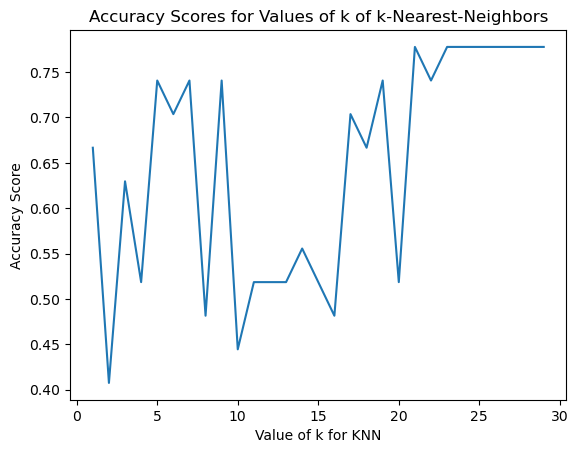

In [650]:
k_range = list(range(1,30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [651]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("The accuracy of the knn is","{:.3f}".format(metrics.accuracy_score(y_pred_knn,y_test)))

The accuracy of the knn is 0.741


Decision tree model

In [652]:
tree = DecisionTreeClassifier(max_depth = 5, random_state = 1)
tree.fit(x_train,y_train)
prediction=tree.predict(x_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.778


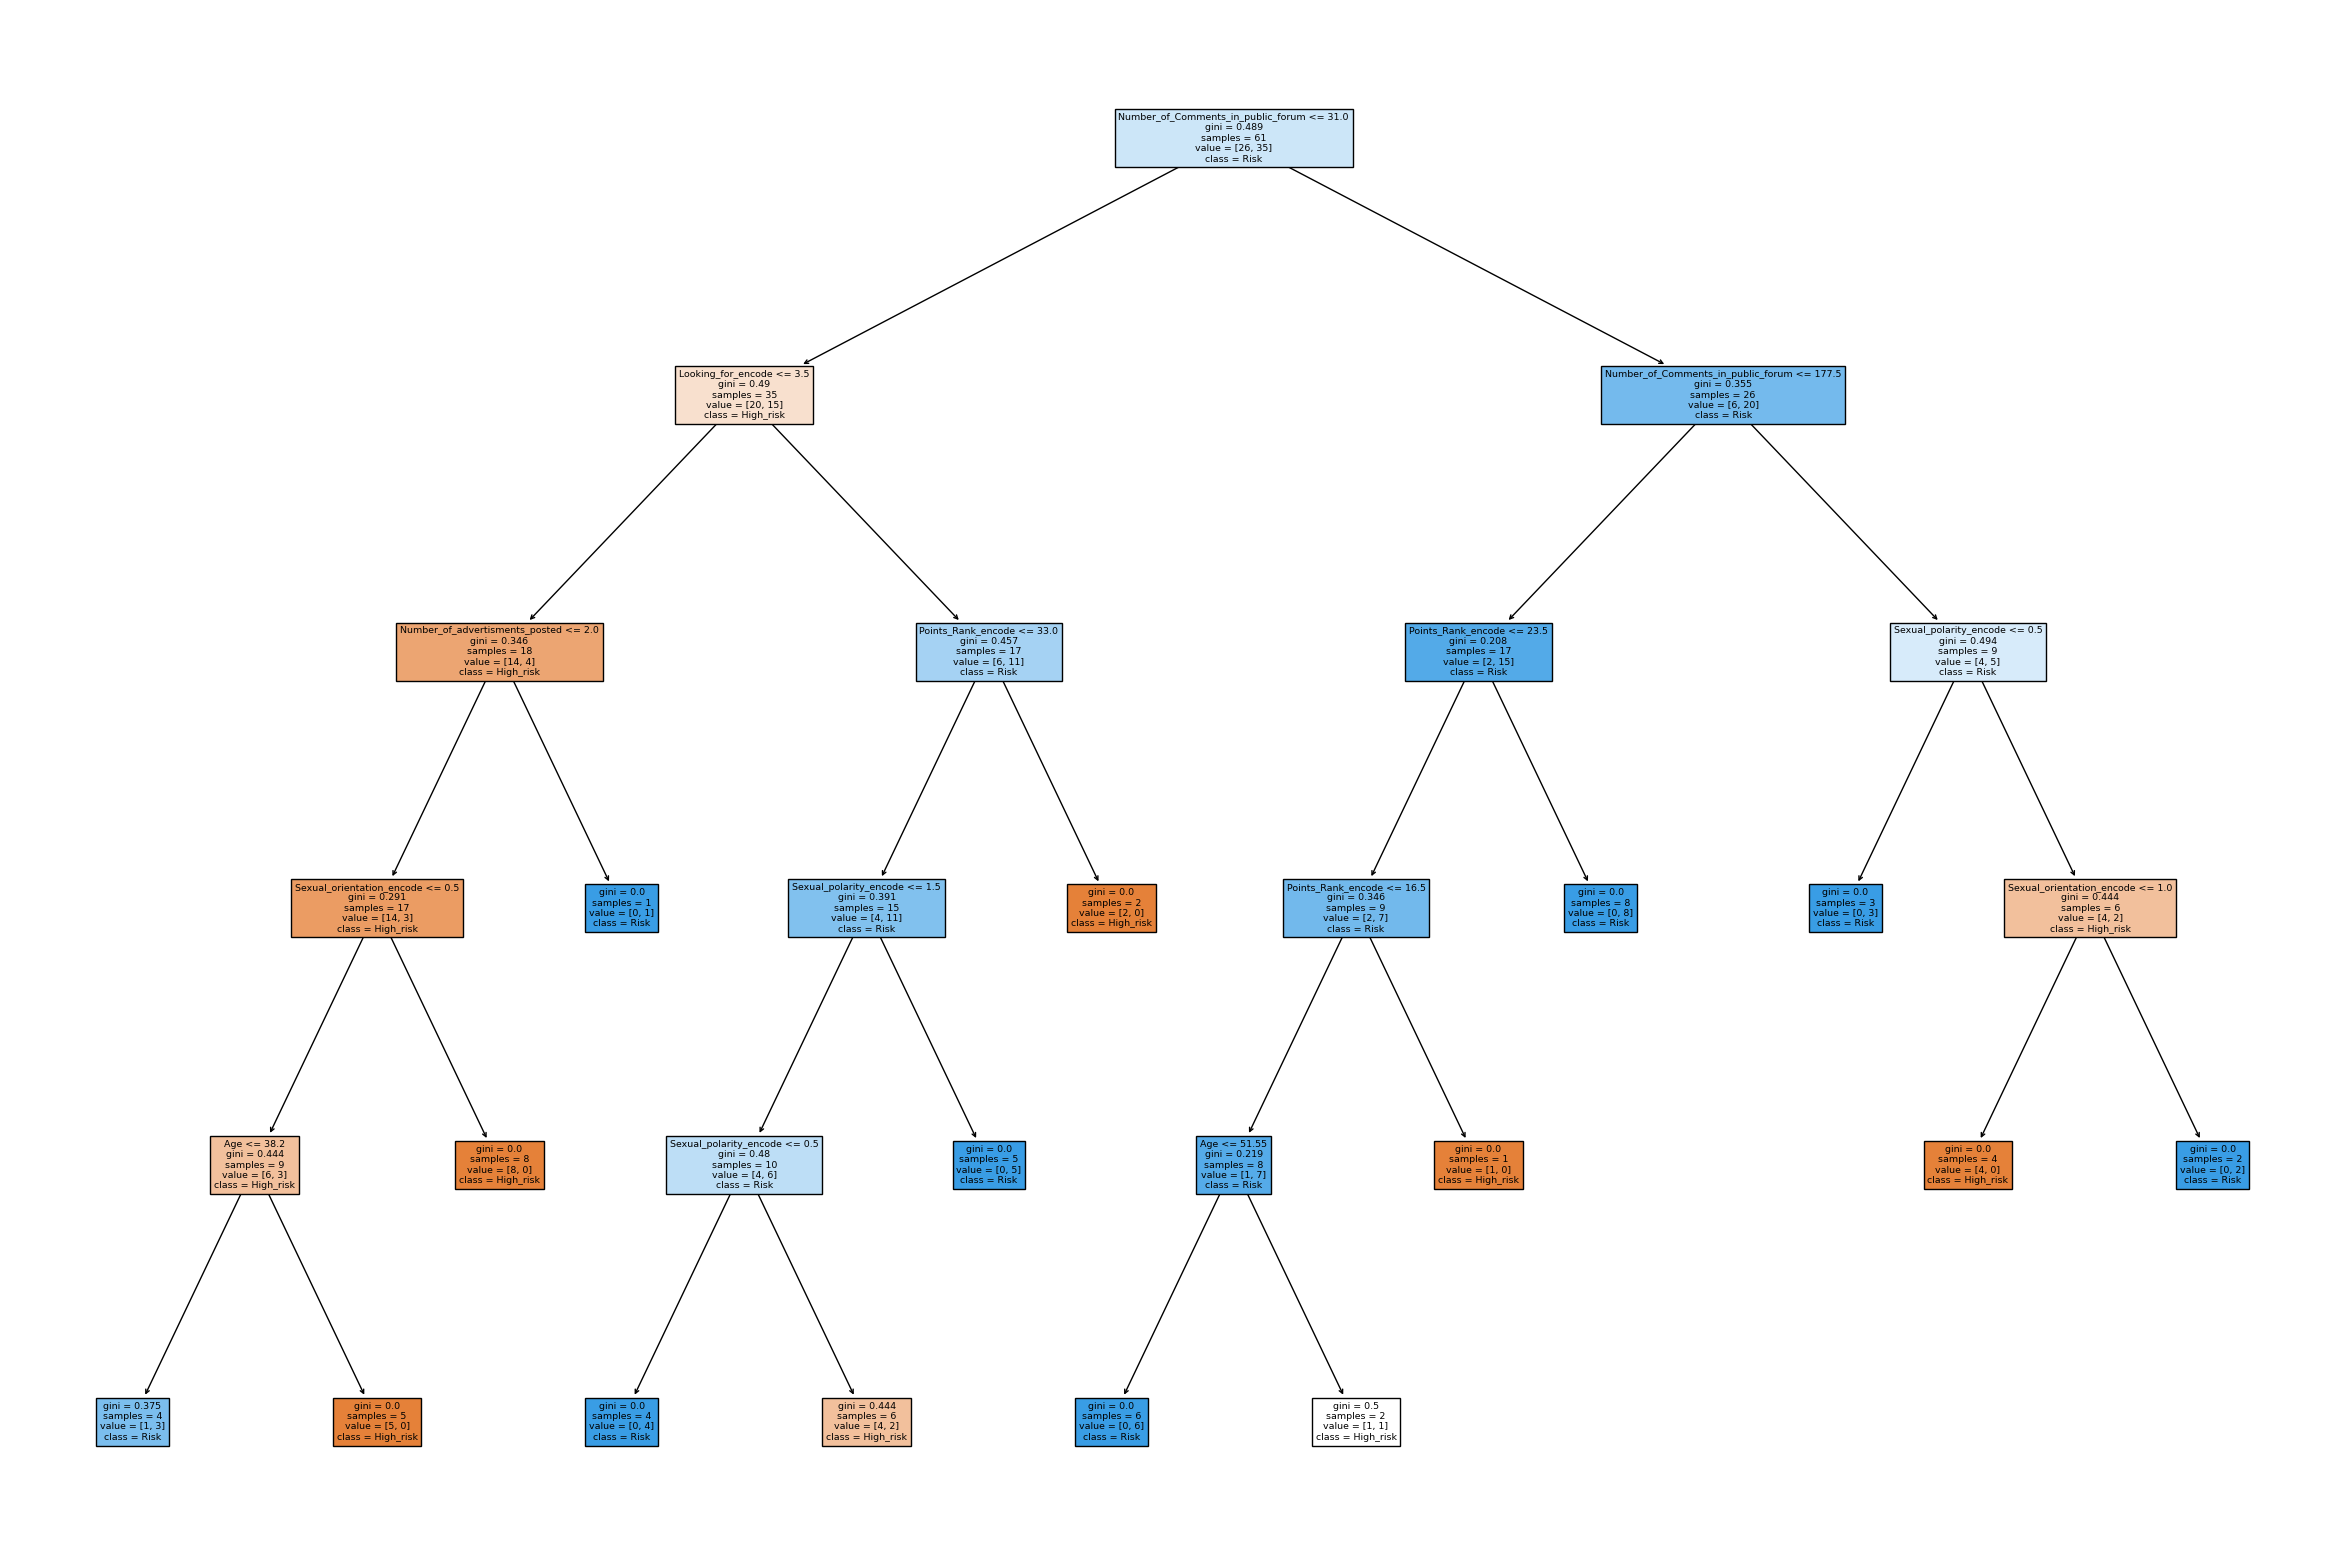

In [653]:
plt.figure(figsize = (30,20))
fn = ["Age", "Member_since", "Number_of_Comments_in_public_forum", "Number_of_advertisments_posted", 
'Number_of_offline_meetings_attended','Profile_pictures','Gender_encode', 'Verification_encode',
 'Sexual_orientation_encode','Sexual_polarity_encode', 'Looking_for_encode','Points_Rank_encode'  ]
cn = ['High_risk','Risk']
plot_tree(tree, feature_names = fn, class_names = cn, filled = True);

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


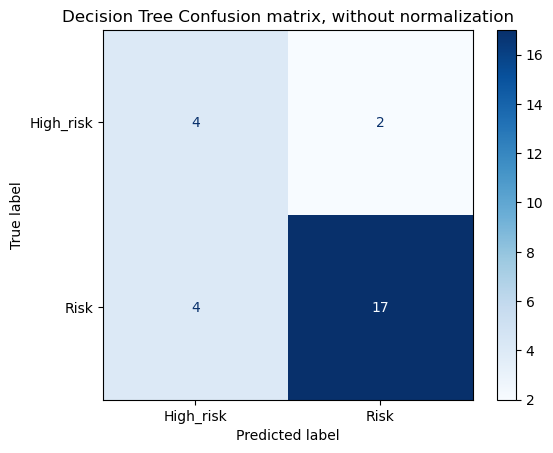

In [654]:
cm = metrics.plot_confusion_matrix(tree, x_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
cm.ax_.set_title('Decision Tree Confusion matrix, without normalization');

In [655]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

The accuracy for Radius Neighbors Classifier is: 81.48148148148148 %

The classification report for Radius Neighbors Classifier is:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.81      1.00      0.89        21

    accuracy                           0.81        27
   macro avg       0.90      0.58      0.59        27
weighted avg       0.85      0.81      0.76        27



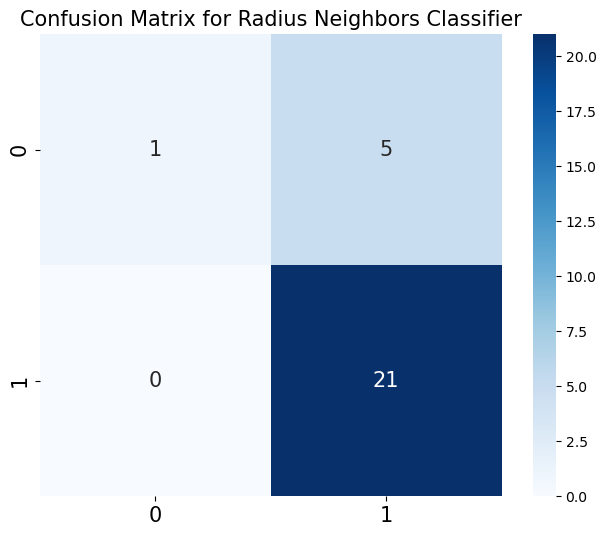

In [667]:
from sklearn.neighbors import RadiusNeighborsClassifier
rnc = RadiusNeighborsClassifier(radius=1400)
rnc.fit(x_train, y_train)
y_pred = rnc.predict(x_test)
acc_rnc = rnc.score(x_test, y_test)
print('The accuracy for Radius Neighbors Classifier is:', acc_rnc * 100, "%")
generate_results(rnc, y_pred, 'Radius Neighbors Classifier')

In [668]:
from sklearn.ensemble import RandomForestClassifier

The accuracy of the Random Forest Classifier is: 62.96296296296296 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       0.76      0.76      0.76        21

    accuracy                           0.63        27
   macro avg       0.46      0.46      0.46        27
weighted avg       0.63      0.63      0.63        27



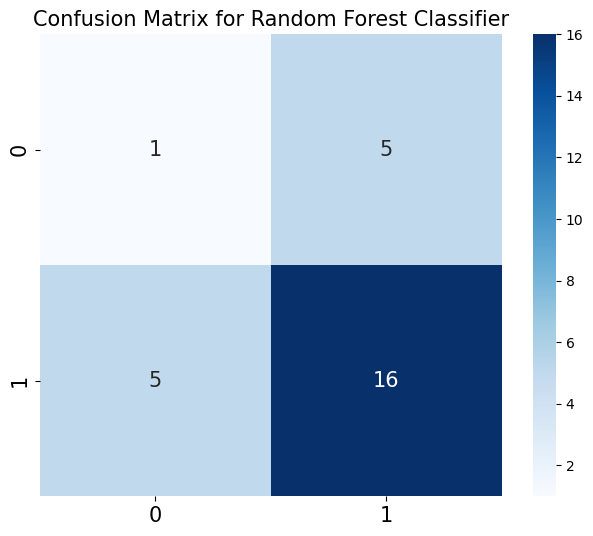

In [669]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

In [ ]:
X1 , X2 , X5 , X7 , X10 ,

In [ ]:
X16 ,X18 , X23 , X75

X66 , X78 , 


In [ ]:
X27, X19 , X42 , X40 , X77